In [ ]:
!wget https://www.dropbox.com/s/xn6qoe86k6zsplw/dataset.zip?dl=0

--2022-07-04 09:59:50--  https://www.dropbox.com/s/xn6qoe86k6zsplw/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xn6qoe86k6zsplw/dataset.zip [following]
--2022-07-04 09:59:50--  https://www.dropbox.com/s/raw/xn6qoe86k6zsplw/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4168117c7da03085d857b0a38a.dl.dropboxusercontent.com/cd/0/inline/BoY7LOXRSsb3rSxxUlmGjnp-IvFojpRwgdOZ0UDPkcuY0PwS71zCLioi9pTFvtK_pWGP0KftTm6b5WwchLx2qnaqqxW4bkyvMADMpbpL0KHkl2NSu1N-89lO4zOSdTdOTh4KLGRWxayFsK8vKABtrRXBQ_pOMyVyrC6DOT8jhqrQ-g/file# [following]
--2022-07-04 09:59:51--  https://uc4168117c7da03085d857b0a38a.dl.dropboxusercontent.com/cd/0/inline/BoY7LOXRSsb3rSxxUlmGjnp-IvFojpRwgdOZ0UDPkcuY0PwS71zCLioi9pTFvtK_pW

In [ ]:
!unzip dataset.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/sad/30743.jpg  
  inflating: dataset/train/sad/30750.jpg  
  inflating: dataset/train/sad/30752.jpg  
  inflating: dataset/train/sad/30757.jpg  
  inflating: dataset/train/sad/30764.jpg  
  inflating: dataset/train/sad/30767.jpg  
  inflating: dataset/train/sad/30776.jpg  
  inflating: dataset/train/sad/3078.jpg  
  inflating: dataset/train/sad/30784.jpg  
  inflating: dataset/train/sad/30785.jpg  
  inflating: dataset/train/sad/30791.jpg  
  inflating: dataset/train/sad/30800.jpg  
  inflating: dataset/train/sad/30810.jpg  
  inflating: dataset/train/sad/30816.jpg  
  inflating: dataset/train/sad/3082.jpg  
  inflating: dataset/train/sad/30833.jpg  
  inflating: dataset/train/sad/30838.jpg  
  inflating: dataset/train/sad/30839.jpg  
  inflating: dataset/train/sad/30846.jpg  
  inflating: dataset/train/sad/30863.jpg  
  inflating: dataset/train/sad/30879.jpg  
  inflating: dataset/train/sad/30880.jpg  
  inf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

#  Building our Model To train the data 

In [ ]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/dataset/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28821 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/dataset/test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 7066 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

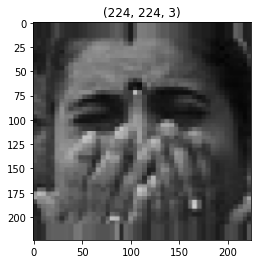

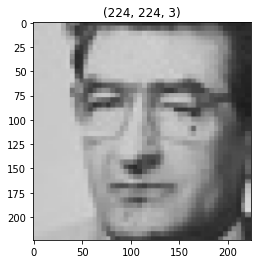

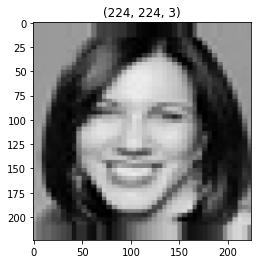

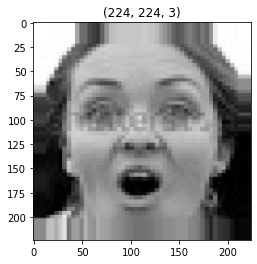

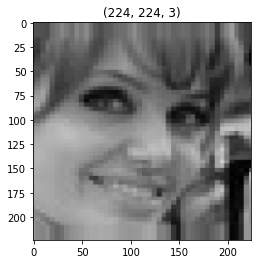

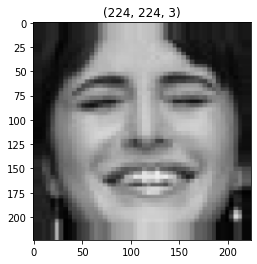

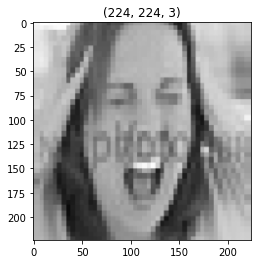

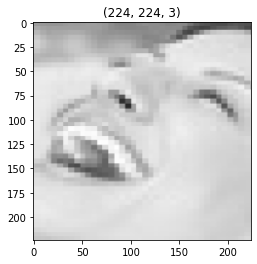

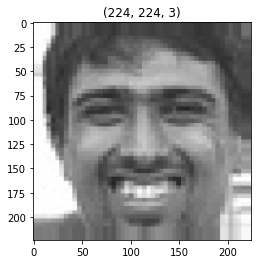

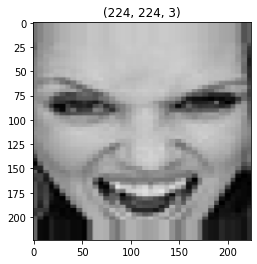

In [ ]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

# having early stopping and model check point

In [ ]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [ ]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 14.3821 - accuracy: 0.2281
Epoch 1: val_accuracy improved from -inf to 0.31250, saving model to best_model.h5
10/10 [==============================] - 16s 461ms/step - loss: 14.3821 - accuracy: 0.2281 - val_loss: 11.0102 - val_accuracy: 0.3125
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 6.8488 - accuracy: 0.3406
Epoch 2: val_accuracy improved from 0.31250 to 0.37109, saving model to best_model.h5
10/10 [==============================] - 4s 429ms/step - loss: 6.8488 - accuracy: 0.3406 - val_loss: 7.2048 - val_accuracy: 0.3711
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 5.7920 - accuracy: 0.3406
Epoch 3: val_accuracy did not improve from 0.37109
10/10 [==============================] - 4s 405ms/step - loss: 5.7920 - accuracy: 0.3406 - val_loss: 5.3129 - val_accuracy: 0.3633
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 5.6748 - accuracy: 0.3938
Epoch 4

In [ ]:

# Loading the best fit model 
from keras.models import load_model
model = load_model("/content/dataset/best_model.h5")

In [ ]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

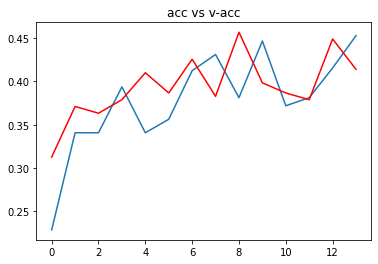

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

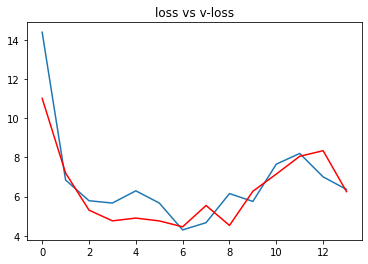

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

 the image is of happy


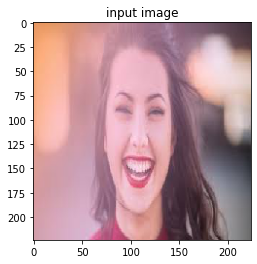

In [ ]:
# path for the image to see if it predics correct class

path = "/content/drive/MyDrive/Sentiment Analysis Project/dataset/validation/Happy/download (1).jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()